**Setup and Data Loading**

In [1]:

import pandas as pd
data = pd.read_csv('https://github.com/ShefaaSaied/Telco-customer-churn-prediction/raw/refs/heads/main/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

# Load the data
df = pd.read_csv('https://github.com/ShefaaSaied/Telco-customer-churn-prediction/raw/refs/heads/main/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Data Exploration**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


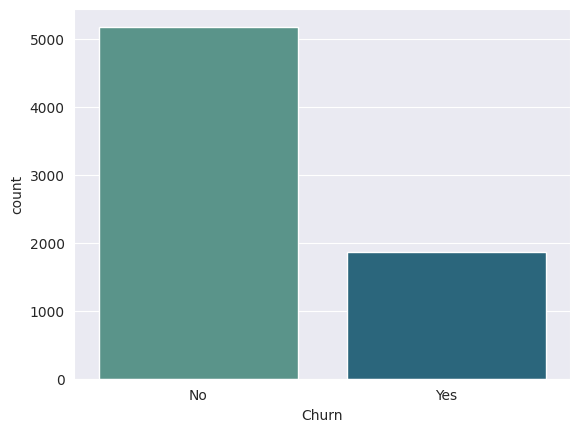

In [2]:
# Display basic information about the dataset
df.info()
df.head()

# Check for missing values
print(df.isna().sum())

# Convert TotalCharges column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Check class distribution
print(df['Churn'].value_counts())
_ = sns.countplot(x='Churn', data=df, palette='crest')

Churn
No     5174
Yes    1869
Name: count, dtype: int64


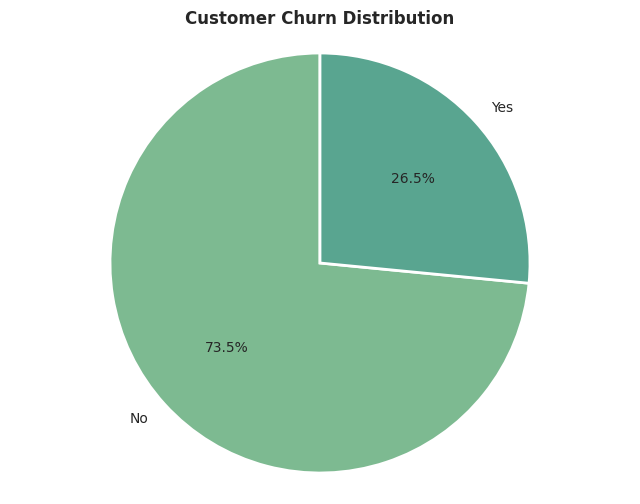

In [3]:
# Check class distribution
churn_counts = df['Churn'].value_counts()
print(churn_counts)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts,
        labels=churn_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('crest'),
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})

plt.title('Customer Churn Distribution', fontweight='bold')
plt.axis('equal')
plt.show()

In [4]:
# Recreate the Churn column
data['Churn'] = data['Churn'].apply(lambda x: "Yes" if x == 1 else "No" if x == 0 else "Unknown")
print(data['Churn'].value_counts(dropna=False))

import plotly.express as px

# Ensure churn values are correctly mapped to "Yes" and "No"
data['Churn'] = data['Churn'].map({1: "Yes", 0: "No"})

# Verify the unique values in the 'Churn' column
print(data['Churn'].unique())

# Create the histogram
fig = px.histogram(
    data,
    x="tenure",
    color="Churn",
    marginal="box",
    title="Customer Tenure Distribution by Churn Status",
    labels={"tenure": "Tenure (Months)", "Churn": "Churn Status"},
    color_discrete_map={"Yes": "#FF4136", "No": "#2ECC40"}
)

# Show the figure
fig.show()

Churn
Unknown    7043
Name: count, dtype: int64
[nan]


**Exploratory Data Analysis**

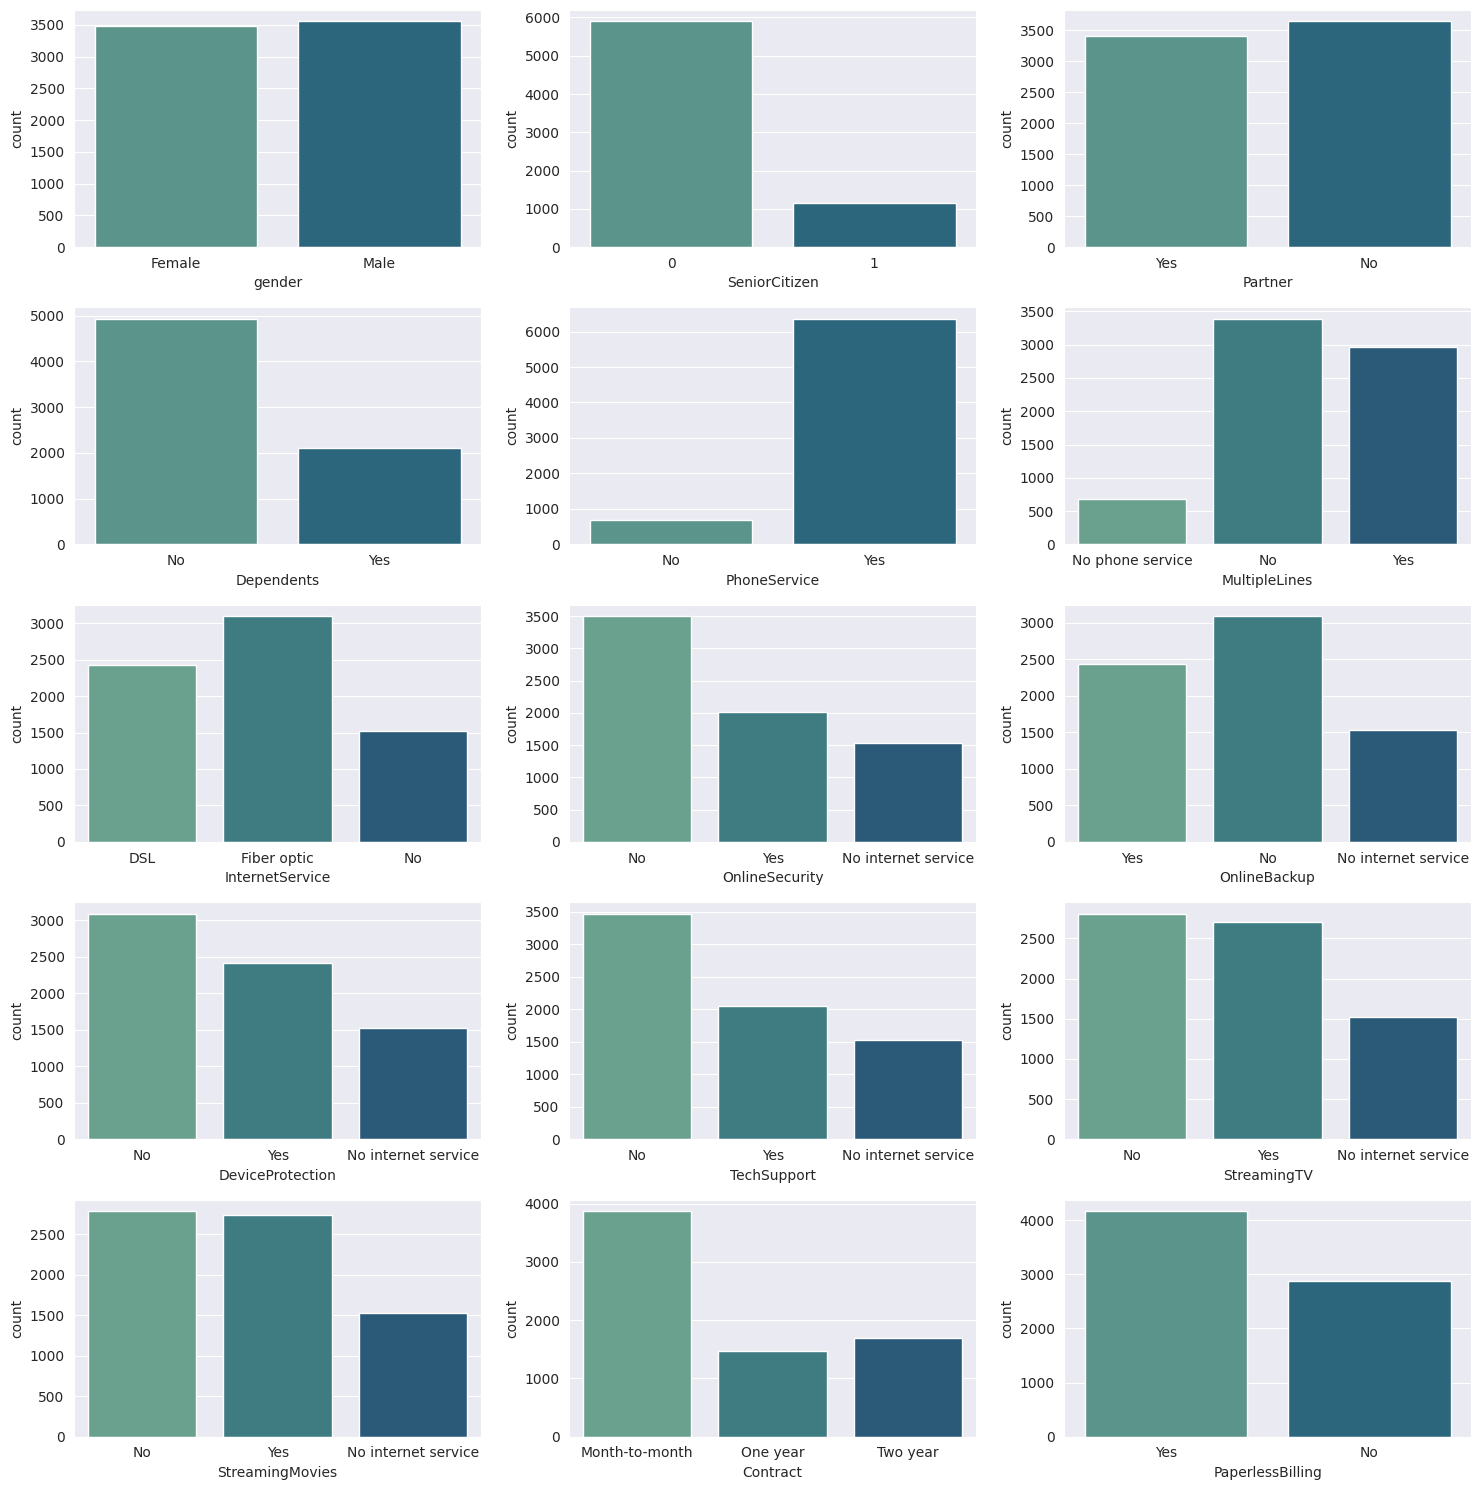

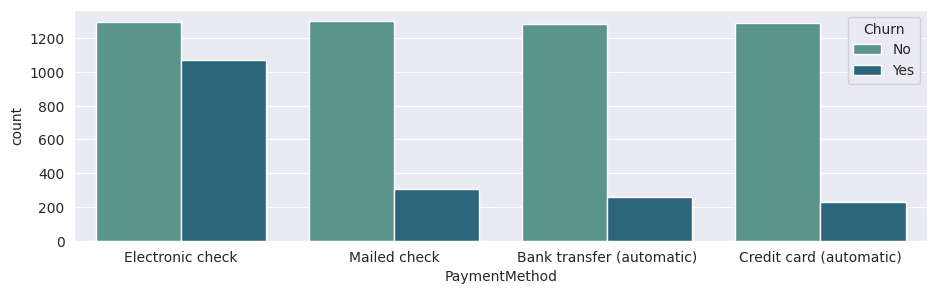

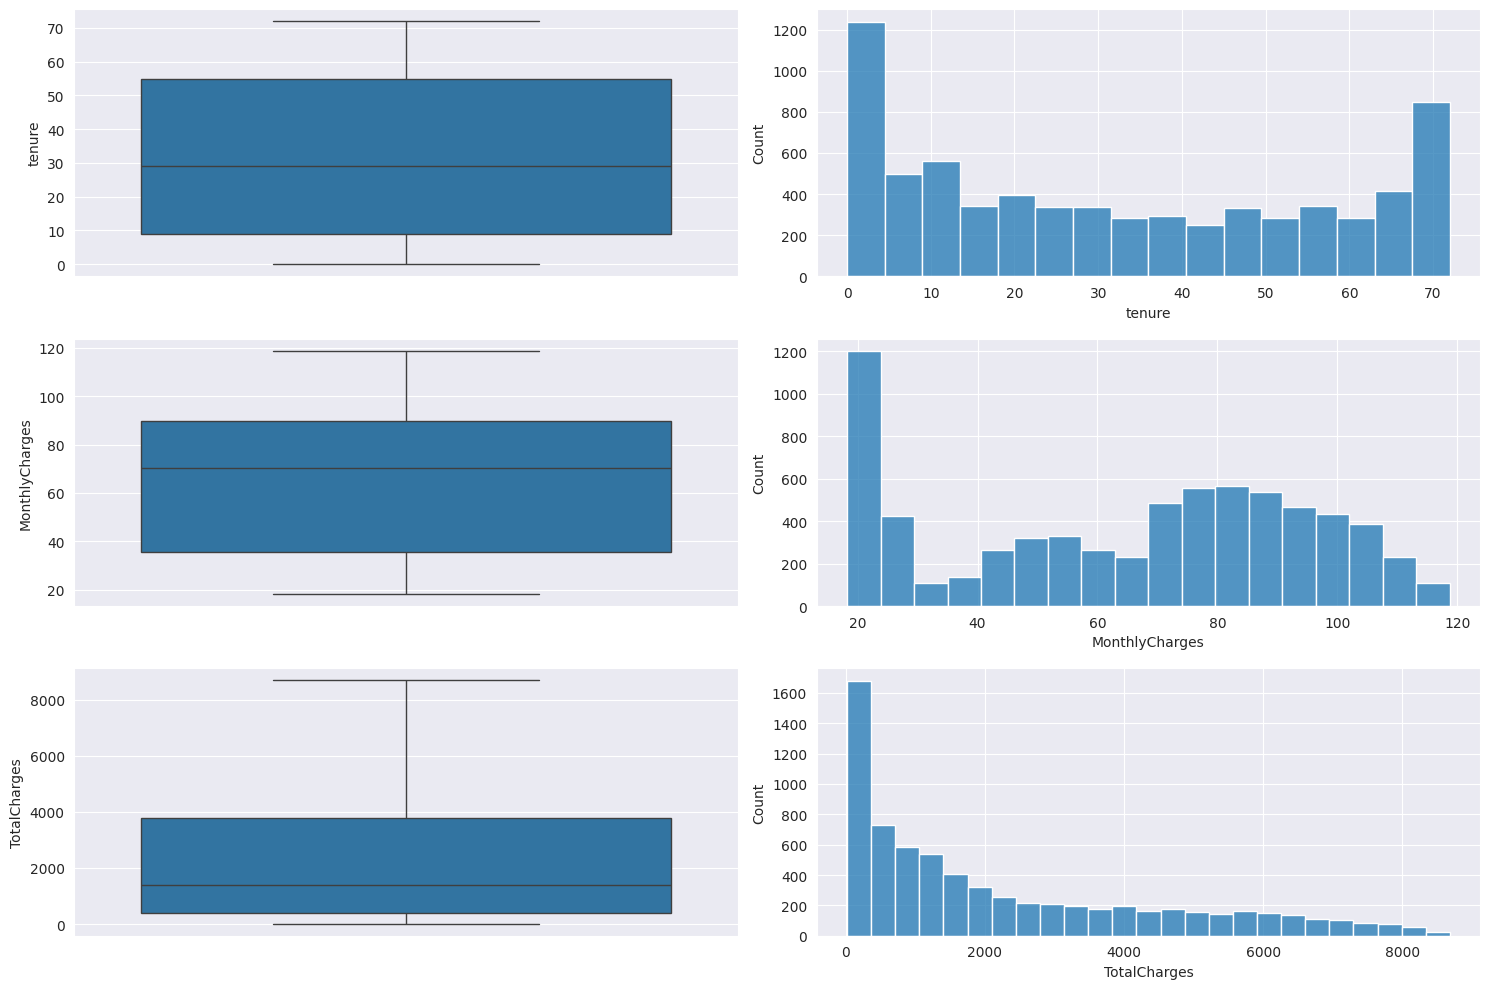

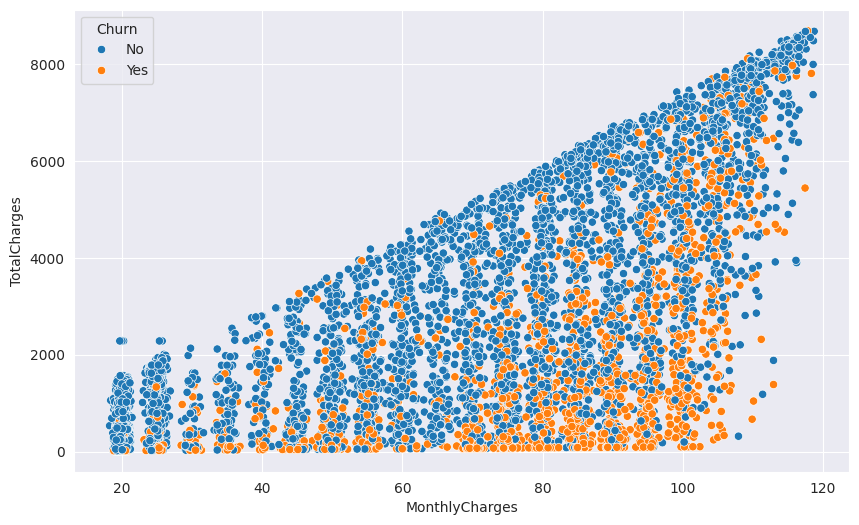

In [5]:
# Categorical features analysis
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling']

plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 3, n + 1)
    sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.tight_layout()
plt.show()

# Payment method vs churn
plt.figure(figsize=(11,3))
_ = sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='crest')
plt.show()

# Numerical features analysis
plt.figure(figsize=(15,10))
plt.subplot(3, 2, 1)
_ = sns.boxplot(y=df['tenure'])
plt.subplot(3, 2, 2)
_ = sns.histplot(x='tenure', data=df)

plt.subplot(3, 2, 3)
_ = sns.boxplot(y=df['MonthlyCharges'])
plt.subplot(3, 2, 4)
_ = sns.histplot(x='MonthlyCharges', data=df)

plt.subplot(3, 2, 5)
_ = sns.boxplot(y=df['TotalCharges'])
plt.subplot(3, 2, 6)
_ = sns.histplot(x='TotalCharges', data=df)
plt.tight_layout()
plt.show()

# Scatter plot to show relationship between charges
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.show()

**Feature Engineering**

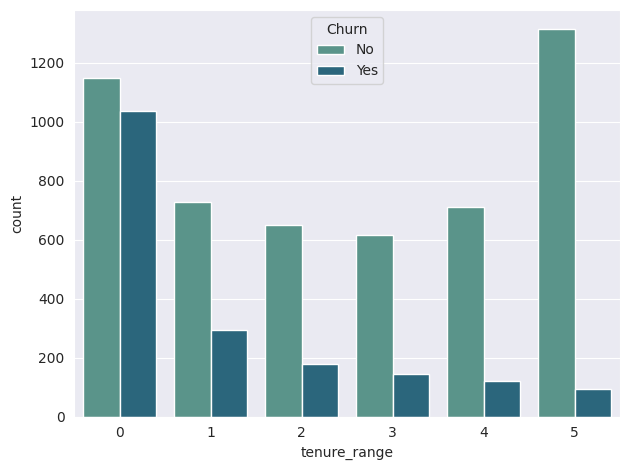

In [6]:
# Replace 'No internet service' and 'No phone service' with 'No'
df.replace(['No internet service', 'No phone service'], 'No', inplace=True)

# Create tenure ranges
condition = [
    ((df.tenure >= 0) & (df.tenure <= 12)),
    ((df.tenure > 12) & (df.tenure <= 24)),
    ((df.tenure > 24) & (df.tenure <= 36)),
    ((df.tenure > 36) & (df.tenure <= 48)),
    ((df.tenure > 48) & (df.tenure <= 60)),
    (df.tenure > 60)
]
choice = [0, 1, 2, 3, 4, 5]  # 0-1year, 1-2years, etc.
df['tenure_range'] = np.select(condition, choice)

# Visualize churn by tenure range
_ = sns.countplot(x='tenure_range', hue='Churn', data=df, palette='crest', order=choice)
plt.tight_layout()
plt.show()

**INSIGHT**

This analysis identifies customer churn patterns across lifecycle stages:

Data Simplification:

Merges "No internet/phone service" into "No" to reduce noise in service-related features.

Tenure Segmentation:

Splits customer tenure into 6 yearly brackets (0–5 = 0–12 months, 13–24 months, etc.) to analyze retention trends.

Key Insight:

The visualization reveals higher churn in early tenure brackets (0–1 year), highlighting critical churn-risk periods.

Strategic Implication:
Prioritize retention efforts (e.g., targeted promotions, support) during the first year of customer lifecycle to mitigate early-stage attrition.

**Data Preprocessing**

In [7]:
# One-hot encode categorical variables
cat_cols = ['gender', 'InternetService', 'PaymentMethod', 'Partner',
            'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']

df = pd.concat([df, pd.get_dummies(df[cat_cols])], axis='columns')
df = df.drop(columns=cat_cols)

# Convert target variable
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

# Apply log transformation to handle skewness
df['MonthlyCharges'] = np.log1p(df['MonthlyCharges'])
df['TotalCharges'] = np.log1p(df['TotalCharges'])

# Split into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Separate features and target
X_train = train_df.drop(columns=['customerID', 'Churn'])
y_train = train_df['Churn']
X_test = test_df.drop(columns=['customerID', 'Churn'])
y_test = test_df['Churn']

# Handle class imbalance with SMOTE
sm = SMOTE(random_state=0, sampling_strategy='minority', k_neighbors=5)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

**Model Training and Evaluation Function**

In [8]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Cross-validation scores
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
    print(f"Cross-validation F1 scores: {scores}")
    print(f"Mean CV F1 score: {scores.mean():.4f}")

    # Predictions
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels'); plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xticks([0.5, 1.5], ['No', 'Yes'])
    plt.yticks([0.5, 1.5], ['No', 'Yes'])
    plt.show()

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

    return model, y_pred

**Model Training and Evaluation**

Logistic Regression
Cross-validation F1 scores: [0.57028112 0.6889881  0.93180516 0.92473118 0.91633914]
Mean CV F1 score: 0.8064


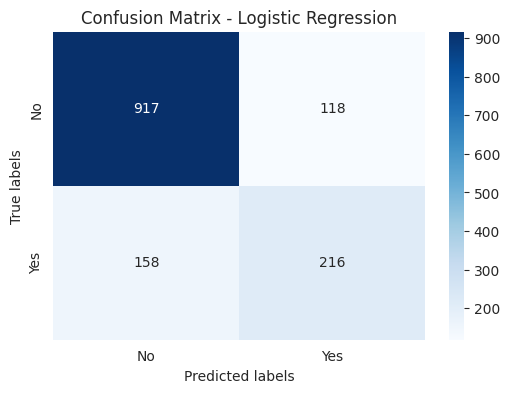


Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.65      0.58      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409


Support Vector Machine
Cross-validation F1 scores: [0.49185947 0.65488086 0.93233945 0.92009132 0.92036405]
Mean CV F1 score: 0.7839


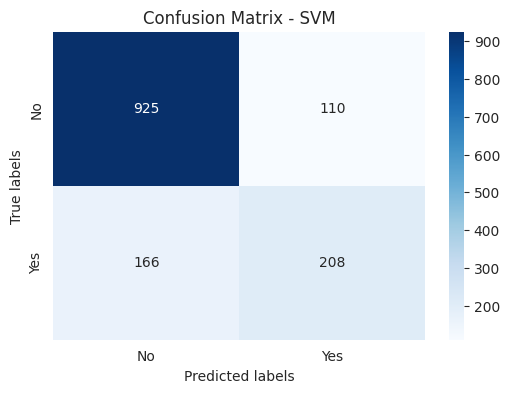


Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1035
         Yes       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409


XGBoost
Cross-validation F1 scores: [0.67723343 0.74434544 0.90847458 0.91224148 0.8949115 ]
Mean CV F1 score: 0.8274


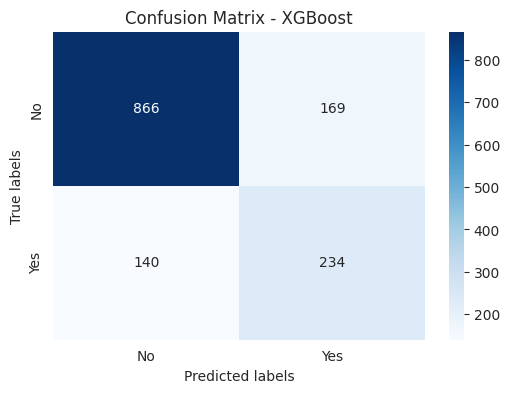


Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.84      0.85      1035
         Yes       0.58      0.63      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.78      0.78      1409


Neural Network
Cross-validation F1 scores: [0.52552301 0.69877786 0.91768632 0.90016367 0.87778959]
Mean CV F1 score: 0.7840


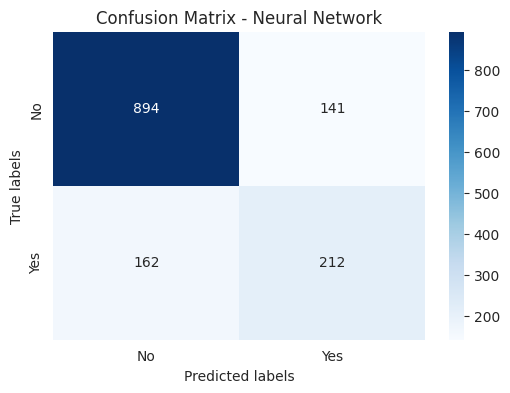


Classification Report:
              precision    recall  f1-score   support

          No       0.85      0.86      0.86      1035
         Yes       0.60      0.57      0.58       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [9]:
# Logistic Regression
print("="*50)
print("Logistic Regression")
print("="*50)
model_logReg = LogisticRegression(C=200, max_iter=1000)
model_logReg, log_pred = evaluate_model(model_logReg, X_train, y_train, X_test, y_test, "Logistic Regression")

# Support Vector Machine
print("\n" + "="*50)
print("Support Vector Machine")
print("="*50)
model_svm = SVC(kernel='linear', C=20)
model_svm, svm_pred = evaluate_model(model_svm, X_train, y_train, X_test, y_test, "SVM")

# XGBoost
print("\n" + "="*50)
print("XGBoost")
print("="*50)
model_xgb = XGBClassifier(
    learning_rate=0.08,
    n_estimators=100,
    max_depth=8,
    gamma=5,
    subsample=0.8,
    min_child_weight=10,
    objective='binary:logistic'
)
model_xgb, xgb_pred = evaluate_model(model_xgb, X_train, y_train, X_test, y_test, "XGBoost")

# Neural Network (MLP)
print("\n" + "="*50)
print("Neural Network")
print("="*50)
model_mlp = MLPClassifier(random_state=1, max_iter=500)
model_mlp, mlp_pred = evaluate_model(model_mlp, X_train, y_train, X_test, y_test, "Neural Network")

**Feature Importance Analysis (for XGBoost)**

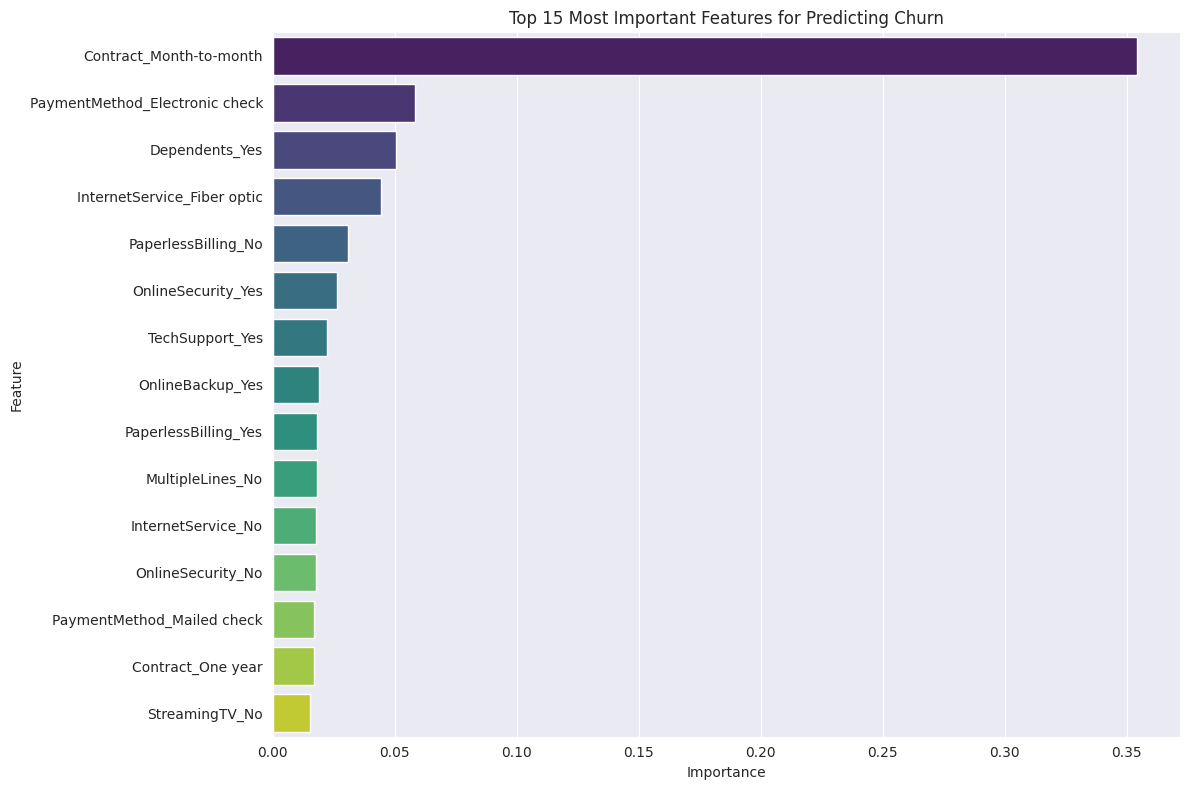

In [10]:
# Get feature importance from XGBoost
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_xgb.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(15)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Top 15 Most Important Features for Predicting Churn')
plt.tight_layout()
plt.show()

**Model Comparison**

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.804116   0.646707  0.577540  0.610169
1                  SVM  0.804116   0.654088  0.556150  0.601156
2              XGBoost  0.780696   0.580645  0.625668  0.602317
3       Neural Network  0.784954   0.600567  0.566845  0.583219


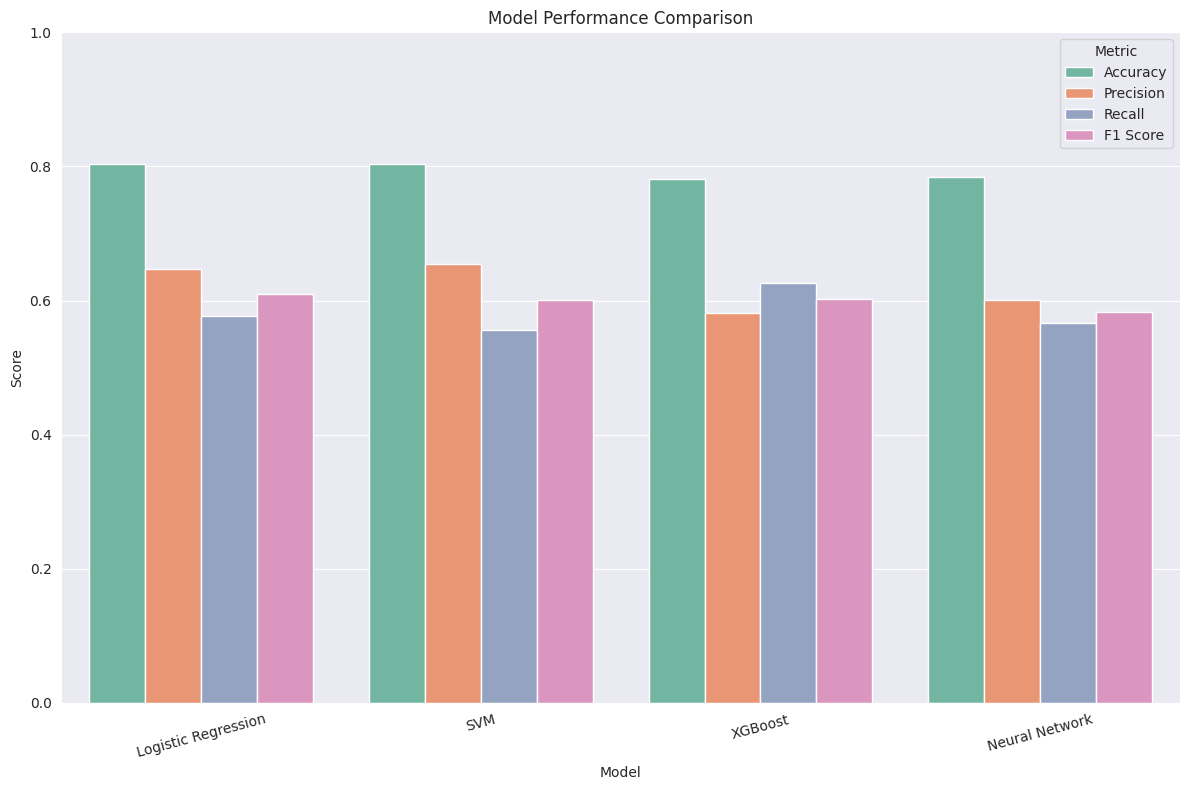

In [11]:
# Create a dataframe to compare model performance
models = ['Logistic Regression', 'SVM', 'XGBoost', 'Neural Network']
predictions = [log_pred, svm_pred, xgb_pred, mlp_pred]

results = []
for model_name, pred in zip(models, predictions):
    accuracy = (pred == y_test).mean()
    from sklearn.metrics import precision_score, recall_score, f1_score
    precision = precision_score(y_test, pred, pos_label=1)
    recall = recall_score(y_test, pred, pos_label=1)
    f1 = f1_score(y_test, pred, pos_label=1)
    results.append([model_name, accuracy, precision, recall, f1])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df)

# Plot model comparison
plt.figure(figsize=(12, 8))
results_melted = pd.melt(results_df, id_vars=['Model'], var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted, palette='Set2')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**Business Insights and Conclusion**


Churn Rate by StreamingTV Subscription:


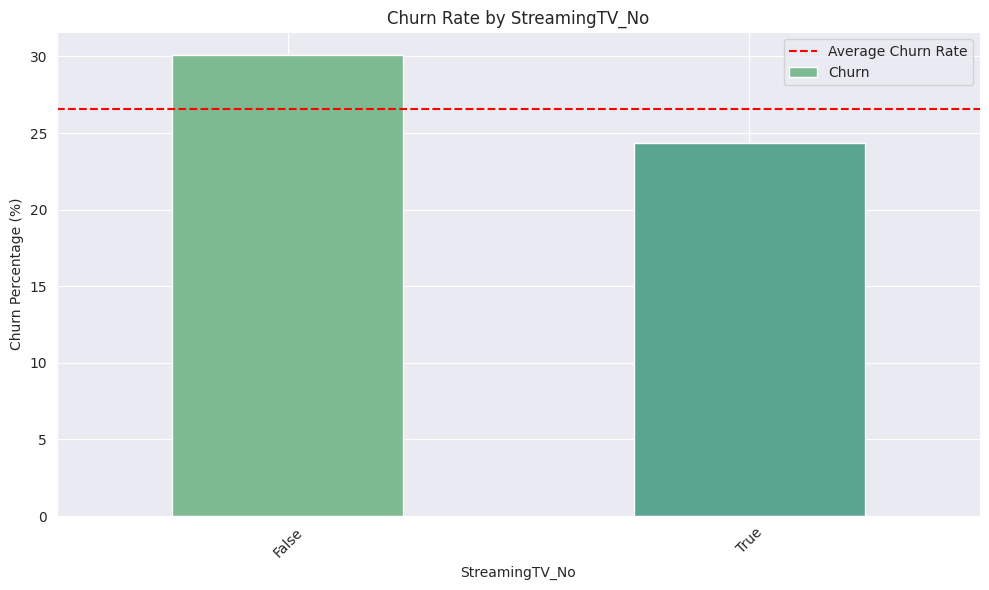

Churn Rate by Contract Type:


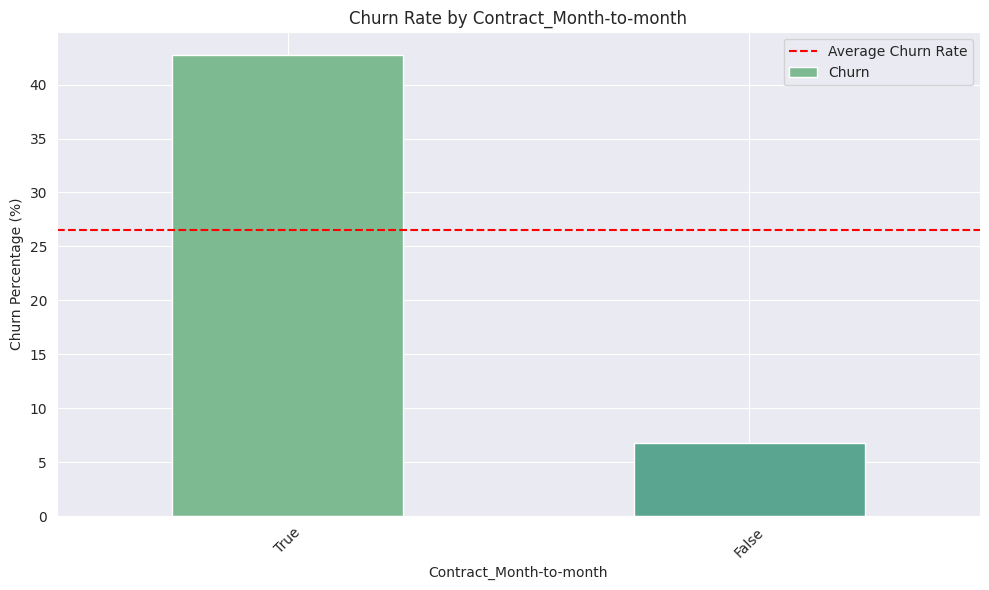


Churn Rate by Internet Service:


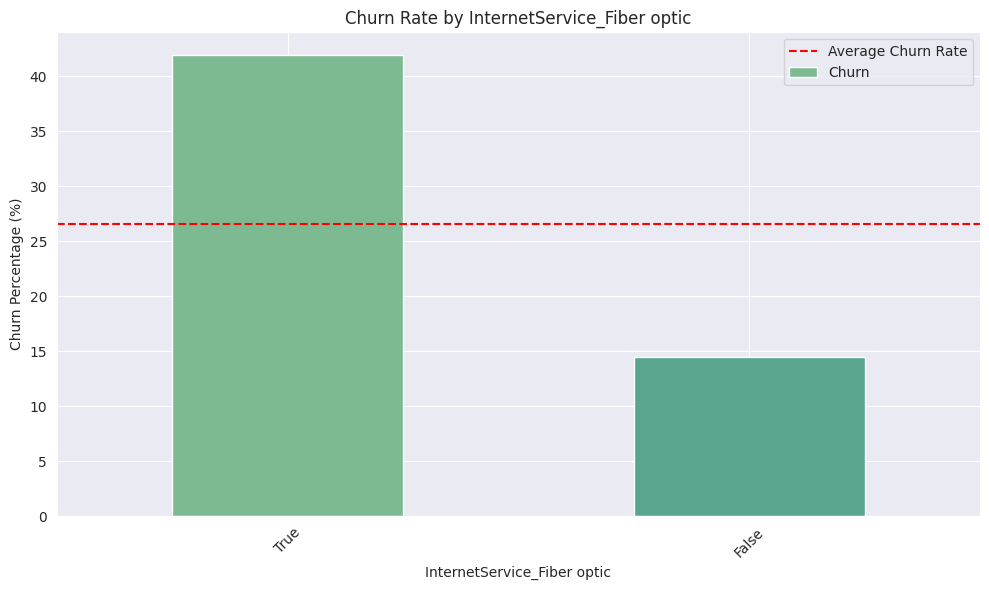


Churn Rate by Payment Method:


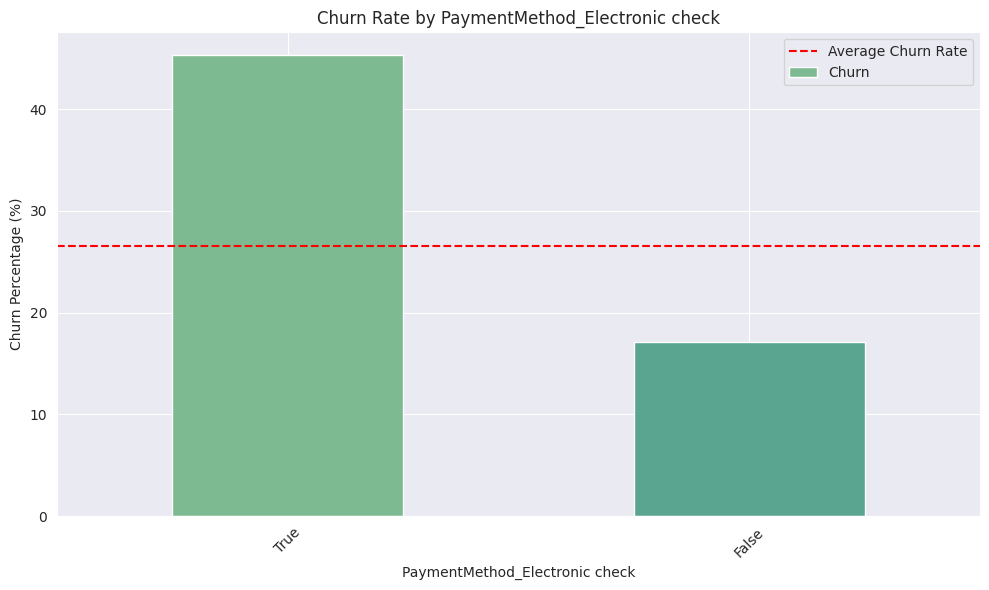


Churn Rate by Tenure Range:


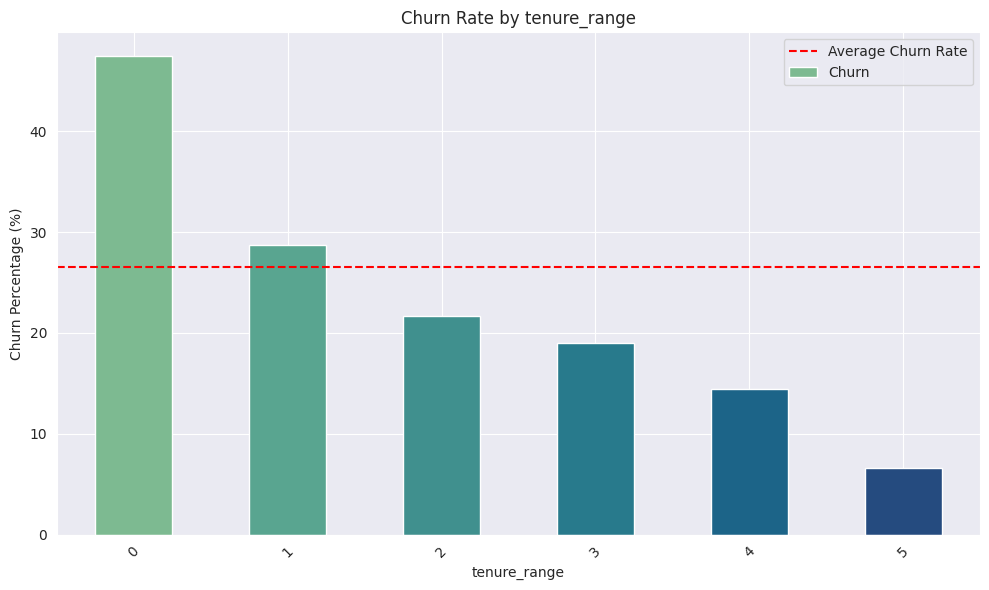

In [12]:
# Function to display percentage of churn by category
def churn_percentage_by_category(feature):
    churn_rate = df.groupby(feature)['Churn'].mean() * 100
    plt.figure(figsize=(10, 6))
    churn_rate.sort_values(ascending=False).plot(kind='bar', color=sns.color_palette("crest"))
    plt.axhline(y=df['Churn'].mean() * 100, color='red', linestyle='--', label='Average Churn Rate')
    plt.xlabel(feature)
    plt.ylabel('Churn Percentage (%)')
    plt.title(f'Churn Rate by {feature}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return churn_rate

# Display churn rates for important categories
print("\nChurn Rate by StreamingTV Subscription:")
tenure_churn = churn_percentage_by_category('StreamingTV_No')

print("Churn Rate by Contract Type:")
contract_churn = churn_percentage_by_category('Contract_Month-to-month')

print("\nChurn Rate by Internet Service:")
internet_churn = churn_percentage_by_category('InternetService_Fiber optic')

print("\nChurn Rate by Payment Method:")
payment_churn = churn_percentage_by_category('PaymentMethod_Electronic check')

print("\nChurn Rate by Tenure Range:")
tenure_churn = churn_percentage_by_category('tenure_range')

In [13]:
data = pd.read_csv('https://github.com/ShefaaSaied/Telco-customer-churn-prediction/raw/refs/heads/main/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()
#data['calc_charges'] = data['Monthly Charges'] * data['Tenure Months']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
import plotly.express as px

# Convert TotalCharges to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Calculate calc_charges and diff_in_charges
data['calc_charges'] = data['MonthlyCharges'] * data['tenure']
data['diff_in_charges'] = data['TotalCharges'] - data['calc_charges']

# Create histogram
fig = px.histogram(
    data,
    x="diff_in_charges",
    color="Contract",
    marginal="box"
)
fig.show()

# Filter out rows with NaN values in 'TotalCharges' and 'diff_in_charges'
filtered_data = data.dropna(subset=['TotalCharges', 'diff_in_charges'])

# Calculate and print quantiles
quantiles = filtered_data.groupby('Contract')[['TotalCharges', 'diff_in_charges']].quantile([0.50, 0.80, 0.90, 0.95])
print(quantiles)

                     TotalCharges  diff_in_charges
Contract                                          
Month-to-month 0.50      679.5500           0.0000
               0.80     2485.7300          24.8100
               0.90     3844.0600          54.0200
               0.95     4966.9200          85.3300
One year       0.50     2657.5500           0.7750
               0.80     5286.4600          55.0500
               0.90     6341.2500          92.2000
               0.95     7072.4725         133.3375
Two year       0.50     3623.9500           0.5000
               0.80     6399.2400          61.5300
               0.90     7457.6100          97.5700
               0.95     7922.3400         139.1800


Looking at this chart more simply:

This shows how customer bills change for different contract types.

The colored dots and boxes at the top show the range of price changes. The middle part shows how common each price change is (taller = more customers).

The numbers at the bottom tell us that longer contracts (one-year and two-year) tend to have bigger price changes than month-to-month contracts.

For example, the biggest price jumps happen with two-year contracts (about $139), while month-to-month contracts have smaller changes (about $85).

This matters for customer churn because people might leave if they see big, unexpected price increases on their bills, especially on longer contracts where they expected stable pricing.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Customer's lifetime in the service**

Before we start looking at what services customers have used and their other characteristics, I think it is important to consider how long customers have used the service and after how many months in the service, customers begin to leave us.

Let's see how many months the clients who are in the churn used our service and is there a point when the largest number of customers stop using the service

In [16]:
df['Churn'].head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [17]:
import plotly.express as px

# Map numeric churn to text labels
df["ChurnLabel"] = df["Churn"].map({0: "No", 1: "Yes"})

# Create the histogram
fig = px.histogram(
    df,
    x="tenure",
    color="ChurnLabel",
    marginal="box"
)
fig.show()


In [18]:
df.groupby('ChurnLabel')['tenure'].quantile([.50,.75,.90,.95])

ChurnLabel      
No          0.50    38.0
            0.75    61.0
            0.90    71.0
            0.95    72.0
Yes         0.50    10.0
            0.75    29.0
            0.90    51.0
            0.95    60.0
Name: tenure, dtype: float64

In [19]:
df.groupby('ChurnLabel')['tenure'].mean()

,tenure
ChurnLabel,
No,37.569965
Yes,17.979133


50% of the customers who left the service did so in the first 10 months. The number of clients in the churn ceases to decline sharply after 5 months in the service. Knowing the reason for the Churn will be very important.

**Contract types**

Let's see what types of contracts there are in the service and how this affects the churn rate.

In [20]:
# Melt dummy columns into a categorical column
melted_df = df.melt(
    id_vars=["Churn"],
    value_vars=["Contract_Month-to-month", "Contract_One year", "Contract_Two year"],
    var_name="Contract",
    value_name="HasContract"
)

# Filter only valid contract holders
melted_df = melted_df[melted_df["HasContract"] == 1]

# Create visualization
fig = px.histogram(
    melted_df,
    x="Churn",
    color="Contract",
    barmode="group",
    title="Churn Distribution by Contract Type",
    labels={"Churn": "Churn Status", "count": "Number of Customers"},
    category_orders={"Contract": ["Contract_Month-to-month", "Contract_One year", "Contract_Two year"]}
)

fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [21]:
import plotly.express as px

# Melt dummy columns into a categorical column
melted_df = df.melt(
    id_vars=["Churn"],
    value_vars=["Contract_Month-to-month", "Contract_One year", "Contract_Two year"],
    var_name="Contract",
    value_name="HasContract"
)

# Filter only valid contract holders
melted_df = melted_df[melted_df["HasContract"] == 1]

# Clean up contract names for display
melted_df["Contract"] = melted_df["Contract"].str.replace("Contract_", "")

# Create pie chart visualization
fig = px.pie(
    melted_df,
    names="Contract",
    facet_col="Churn",
    title="Churn Distribution by Contract Type",
    color="Contract",
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Improve layout and labels
fig.update_traces(textinfo='percent+label')
fig.update_layout(
    margin=dict(t=50, b=50),
    legend_title="Contract Type"
)

fig.show()

In [22]:
# First, create the melted dataframe including tenure in the id_vars
melted_df = df.melt(
    id_vars=["Churn", "tenure"],  # Include tenure in id_vars
    value_vars=["Contract_Month-to-month", "Contract_One year", "Contract_Two year"],
    var_name="Contract",
    value_name="HasContract"
)

# Filter only valid contract holders
melted_df = melted_df[melted_df["HasContract"] == 1]

# Now calculate the mean tenure by Contract type and Churn status
mean_tenure = melted_df.groupby(['Contract', 'Churn'])['tenure'].mean()

# Display the results
print(mean_tenure)

# If you want it as a dataframe instead of a Series
mean_tenure_df = mean_tenure.reset_index()
print(mean_tenure_df)

Contract                 Churn
Contract_Month-to-month  0        21.033333
                         1        14.016918
Contract_One year        0        41.674063
                         1        44.963855
Contract_Two year        0        56.602914
                         1        61.270833
Name: tenure, dtype: float64
                  Contract  Churn     tenure
0  Contract_Month-to-month      0  21.033333
1  Contract_Month-to-month      1  14.016918
2        Contract_One year      0  41.674063
3        Contract_One year      1  44.963855
4        Contract_Two year      0  56.602914
5        Contract_Two year      1  61.270833


In [23]:
# Create a new column that identifies which contract type each customer has
def get_contract_type(row):
    if row['Contract_Month-to-month'] == 1:
        return 'Month-to-month'
    elif row['Contract_One year'] == 1:
        return 'One year'
    elif row['Contract_Two year'] == 1:
        return 'Two year'
    else:
        return 'Unknown'

# Add the contract type column to the original dataframe
df['ContractType'] = df.apply(get_contract_type, axis=1)

# Now calculate the mean tenure by Contract type and Churn status
mean_tenure = df.groupby(['ContractType', 'Churn'])['tenure'].mean().reset_index()

# Display the results
print(mean_tenure)

# Optional: Create a visualization of the results
import plotly.express as px

fig = px.bar(
    mean_tenure,
    x='ContractType',
    y='tenure',
    color='Churn',
    barmode='group',
    title='Mean Tenure by Contract Type and Churn Status',
    labels={'tenure': 'Average Tenure (months)', 'ContractType': 'Contract Type'}
)

fig.show()

     ContractType  Churn     tenure
0  Month-to-month      0  21.033333
1  Month-to-month      1  14.016918
2        One year      0  41.674063
3        One year      1  44.963855
4        Two year      0  56.602914
5        Two year      1  61.270833


In [61]:
import plotly.express as px

fig = px.histogram(df, x="TotalCharges", color="ChurnLabel",
                    marginal="box",
                    title="Distribution of Total Charges by Churn Status")  # Added title
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['CustomerID', 'Senior Citizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_range', 'gender_Female', 'gender_Male', 'Internet Service_DSL', 'Internet Service_Fiber optic', 'Internet Service_No', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'Churn Label', 'ContractType', 'InternetService', 'PaymentMethod', 'Churn_Binary', 'Partner', 'Dependents', 'Internet Service'] but received: ChurnLabel

In [25]:
df.columns.tolist()

['customerID',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_range',
 'gender_Female',
 'gender_Male',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'MultipleLines_No',
 'MultipleLines_Yes',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'ChurnLabel',
 'ContractType']

In [26]:
import plotly.express as px

# Create the histogram with "Churn" column instead of "ChurnLabel"
fig = px.histogram(
    df,
    x="TotalCharges",
    color="ChurnLabel",  # Using "Churn" instead of "ChurnLabel"
    marginal="box",
    title="Distribution of Total Charges by Churn Status",
    labels={"TotalCharges": "Total Charges ($)", "Churn": "Churn Status"},
    color_discrete_map={"Yes": "blue", "No": "red"}  # Optional: custom colors
)

# Improve layout
fig.update_layout(
    bargap=0.1,
    legend_title="Churn Status"
)

fig.show()

In [27]:
import plotly.express as px

# Create the histogram with "Churn" column instead of "ChurnLabel"
fig = px.histogram(
    df,
    x="Contract_Month-to-month",
    color="ChurnLabel",  # Using "Churn" instead of "ChurnLabel"
    marginal="box",
    title="Distribution of Monthly Charges by Churn Status",
    labels={"Contract_Month-to-month": "Contract_Month-to-month($)", "Churn": "Churn Status"},
    color_discrete_map={"No": "blue", "Yes": "red"}  # Optional: custom colors
)

# Improve layout
fig.update_layout(
    bargap=0.1,
    legend_title="Churn Status"
)

fig.show()

In [28]:
# Filter for only month-to-month contract customers
month_to_month_df = df[df['Contract_Month-to-month'] == 1]

# Calculate quantiles of MonthlyCharges grouped by ChurnLabel
quantiles = month_to_month_df.groupby('Churn')['MonthlyCharges'].quantile([.50, .75, .95, .99])
print(quantiles)

# Reset the index for easier access and readability
quantiles_df = quantiles.reset_index()
print("\nAs DataFrame:")
print(quantiles_df)

# Optional: Visualize the results
import plotly.express as px

# Create a bar chart of the median (50th percentile) monthly charges by churn status
median_charges = month_to_month_df.groupby('Churn')['MonthlyCharges'].median().reset_index()

fig = px.bar(
    median_charges,
    x='Churn',
    y='MonthlyCharges',
    title='Median Monthly Charges for Month-to-month Contracts by Churn Status',
    labels={'MonthlyCharges': 'Median Monthly Charges ($)', 'Churn': 'Churn Status'},
    color='Churn',
    color_discrete_map={'No': 'blue', 'Yes': 'red'}
)

fig.show()

# Create a box plot to show the distribution
fig2 = px.box(
    month_to_month_df,
    x='Churn',
    y='MonthlyCharges',
    title='Distribution of Monthly Charges for Month-to-month Contracts by Churn Status',
    labels={'MonthlyCharges': 'Monthly Charges ($)', 'Churn': 'Churn Status'},
    color='ChurnLabel',
    points="all"
)

fig2.show()

Churn      
0      0.50    4.188897
       0.75    4.453329
       0.95    4.641671
       0.99    4.704110
1      0.50    4.382651
       0.75    4.520429
       0.95    4.649426
       0.99    4.685579
Name: MonthlyCharges, dtype: float64

As DataFrame:
   Churn  level_1  MonthlyCharges
0      0     0.50        4.188897
1      0     0.75        4.453329
2      0     0.95        4.641671
3      0     0.99        4.704110
4      1     0.50        4.382651
5      1     0.75        4.520429
6      1     0.95        4.649426
7      1     0.99        4.685579


In [29]:
df.ContractType

,ContractType
0,Month-to-month
1,One year
2,Month-to-month
3,One year
4,Month-to-month
...,...
7038,One year
7039,One year
7040,Month-to-month
7041,Month-to-month


In [30]:
import pandas as pd
import plotly.express as px

# Create a copy of the original DataFrame
corr_df = df.copy()

# Make sure ChurnLabel is binary (1/0)
corr_df['ChurnLabel'] = corr_df['Churn'].replace({'Yes': 1, 'No': 0})

# Define the categories you want to include
categories = [
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Select only the columns that start with these categories
selected_columns = []
for category in categories:
    category_columns = [col for col in df.columns if col.startswith(category + '_')]
    selected_columns.extend(category_columns)

# Create the DataFrame with only the selected columns and ChurnLabel
df_dummies = corr_df[selected_columns + ['Churn']]

# Convert all columns to binary 0/1 format
for col in selected_columns:
    df_dummies[col] = df_dummies[col].replace({'Yes': 1, 'No': 0, True: 1, False: 0})

# Display the first few rows of the resulting DataFrame
print("First 5 rows of the processed DataFrame:")
print(df_dummies.head())

df_dummies.head()

First 5 rows of the processed DataFrame:
   PhoneService_No  PhoneService_Yes  MultipleLines_No  MultipleLines_Yes  \
0                1                 0                 1                  0   
1                0                 1                 1                  0   
2                0                 1                 1                  0   
3                1                 0                 1                  0   
4                0                 1                 1                  0   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   OnlineSecurity_No  OnlineSecurity_Yes  Onl

,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Churn
0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0
1,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0
2,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1
3,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0
4,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


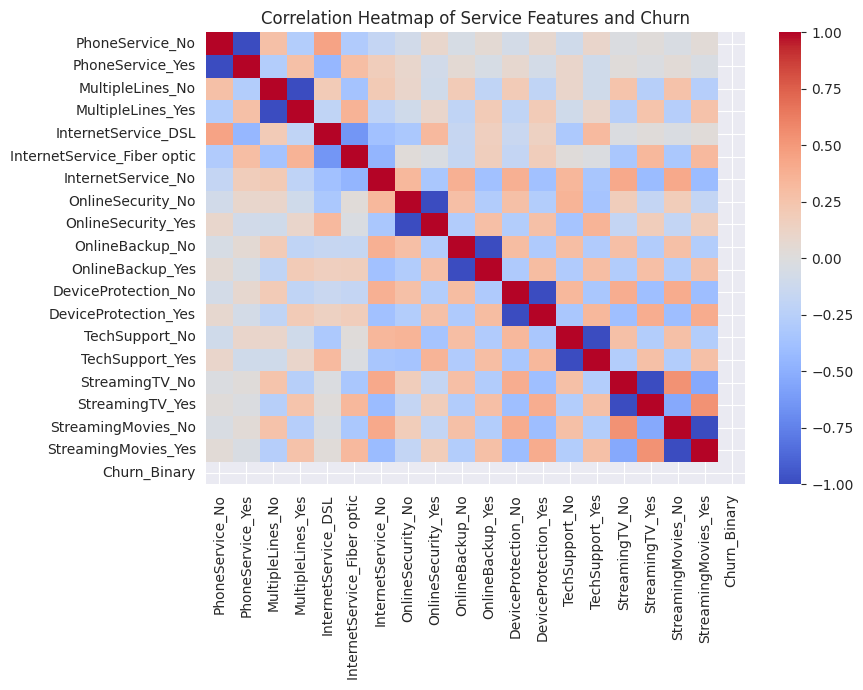

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure we create the Churn_Binary column if it doesn't exist
if 'Churn_Binary' not in df_dummies.columns:
    df_dummies['Churn_Binary'] = df_dummies['Churn'].map({'Yes': 1, 'No': 0})

# Create the correlation matrix using only numeric columns
# Drop the original 'Churn' column but keep 'Churn_Binary'
correlation_matrix = df_dummies.drop('Churn', axis=1).corr()

# Create the heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Service Features and Churn')
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
import pandas as pd
import plotly.express as px
import numpy as np

# Create a copy of the original DataFrame
corr_df = df.copy()

# Define the categories you want to include
categories = [
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling'
]

# Select columns that start with these categories
selected_columns = [col for col in df.columns if any(col.startswith(cat + '_') for cat in categories)]

# Create a new DataFrame with only the selected columns and Churn
df_dummies = corr_df[selected_columns + ['Churn']].copy()

# Since all columns are already int64 according to the error output, we don't need to convert them
# But we still need to create a proper numeric Churn_Binary column

# First check if Churn is numeric or object
if df_dummies['Churn'].dtype == 'object':
    # If Churn is a string ('Yes'/'No'), convert it to binary
    df_dummies['Churn_Binary'] = df_dummies['Churn'].map({'Yes': 1, 'No': 0})
else:
    # If Churn is already numeric, just copy it
    df_dummies['Churn_Binary'] = df_dummies['Churn']

# Ensure the Churn_Binary column is numeric
df_dummies['Churn_Binary'] = pd.to_numeric(df_dummies['Churn_Binary'])

# Display the first few rows of the resulting DataFrame with dtypes
print("First 5 rows of the processed DataFrame:")
print(df_dummies.head())
print("\nData types:")
print(df_dummies.dtypes)

# Calculate correlation with the binary Churn column
correlation_with_churn = df_dummies.drop('Churn', axis=1).corr()['Churn_Binary'].sort_values(ascending=False)

# Display the correlations
print("\nCorrelation with Churn:")
print(correlation_with_churn)

# Visualize the top correlations (excluding Churn_Binary itself)
top_correlations = correlation_with_churn[correlation_with_churn.index != 'Churn_Binary'].sort_values(ascending=False)

# Create visualization
fig = px.bar(
    x=top_correlations.values,
    y=top_correlations.index,
    orientation='h',
    title='Service Feature Correlations with Churn',
    labels={'x': 'Correlation Coefficient', 'y': 'Feature'},
    color=top_correlations.values,
    color_continuous_scale='RdBu_r'
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    xaxis_title="Correlation with Churn (positive = more likely to churn)",
    height=max(500, len(top_correlations) * 25),
    margin=dict(l=20, r=20, t=40, b=20)
)

fig.show()

First 5 rows of the processed DataFrame:
   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                 True                        False               False   
1                 True                        False               False   
2                 True                        False               False   
3                 True                        False               False   
4                False                         True               False   

   PhoneService_No  PhoneService_Yes  PaperlessBilling_No  \
0             True             False                False   
1            False              True                 True   
2            False              True                False   
3             True             False                 True   
4            False              True                False   

   PaperlessBilling_Yes  MultipleLines_No  MultipleLines_Yes  \
0                  True              True              False   
1            

In [33]:
# Get dummy columns for InternetService (e.g., 'InternetService_Fiber', 'InternetService_DSL')
internet_cols = [col for col in df.columns if col.startswith('InternetService_')]

# Sum dummy columns to get counts
internet_counts = df[internet_cols].sum().reset_index()
internet_counts.columns = ['InternetService', 'Count']

# Plot
fig = px.bar(
    internet_counts,
    x='InternetService',
    y='Count',
    color='InternetService',
    text='Count',
    title='Customer Count by Internet Service Type'
)
fig.show()

Most of the clients are connected to the fiber optic internet (which correlates with churn value hahahahah). We also see a group of customers who do not use Internet services (most likely use only phone services), and apparently the churn rate among such customers is lower (according to the correlation graph, but we will check this later).

Let's see what Internet services were used by customers who left the service:

In [34]:
# Step 1: Identify InternetService dummy columns
internet_cols = [col for col in df.columns if col.startswith('InternetService_')]

# Step 2: Melt dummy columns to recreate the original "InternetService" categories
internet_melted = df.melt(
    id_vars='customerID',
    value_vars=internet_cols,
    var_name='InternetService',
    value_name='HasService'
).query('HasService == 1')  # Keep only rows where the service is True/1

# Clean up the category names (remove "InternetService_" prefix)
internet_melted['InternetService'] = internet_melted['InternetService'].str.replace('InternetService_', '')

# Step 3: Merge with Churn data
merged_df = pd.merge(
    internet_melted[['customerID', 'InternetService']],
    df[['customerID', 'Churn']],  # Replace 'Churn' with 'Churn Label' if your column name differs
    on='customerID'
)

# Step 4: Group and plot
fig = px.pie(
    merged_df.groupby(['InternetService', 'Churn'])['customerID'].count().reset_index(),
    values='customerID',
    names='InternetService',
    facet_col='Churn',  # Split into subplots by Churn status
    title='Internet Service Types for Churned vs. Retained Customers',
    labels={'customerID': 'Count'}
)

fig.update_traces(textinfo='percent+label')
fig.show()

Whoooooooo, 69 percent of those who left the service were connected to the fiber optic Internet

Google told me that the fiber optic Internet should be better than DSL, what's wrong then

what

But this type of Internet is also more expensive and less common (Google told me so). We will not go into details, but we will remember that about 70 percent of those who stopped using the service were connected to the fiber optic Internet.

In [35]:
# Reconstruct InternetService from dummy columns
internet_cols = [col for col in df.columns if col.startswith('InternetService_')]
internet_melted = df.melt(
    id_vars='customerID',
    value_vars=internet_cols,
    var_name='InternetService',
    value_name='HasService'
).query('HasService == 1')
internet_melted['InternetService'] = internet_melted['InternetService'].str.replace('InternetService_', '')

# Reconstruct TechSupport from dummy columns
techsupport_cols = [col for col in df.columns if col.startswith('TechSupport_')]
techsupport_melted = df.melt(
    id_vars='customerID',
    value_vars=techsupport_cols,
    var_name='TechSupport',
    value_name='HasTechSupport'
).query('HasTechSupport == 1')
techsupport_melted['TechSupport'] = techsupport_melted['TechSupport'].str.replace('TechSupport_', '')

# Merge with Churn data
merged_df = pd.merge(
    internet_melted[['customerID', 'InternetService']],
    techsupport_melted[['customerID', 'TechSupport']],
    on='customerID',
    how='inner'
).merge(
    df[['customerID', 'Churn']],  # Replace 'Churn' with 'Churn Label' if your column name differs
    on='customerID'
)

# Rest of your plotting code remains the same
fig = px.bar(
    merged_df.groupby(['InternetService', 'TechSupport', 'Churn'])['customerID'].count().reset_index(),
    x='InternetService',
    y='customerID',
    color='Churn',
    text='customerID',
    barmode="group",
    facet_col="TechSupport",
    title='Churn Distribution by Internet Service and Tech Support',
    labels={'customerID': 'Number of Customers', 'Churn': 'Churn Status'}
)

fig.update_layout(yaxis_title="Customer Count")
fig.show()

In [36]:
fig = px.pie(merged_df.groupby(['TechSupport','Churn'])['customerID'].count().reset_index(),
             values='customerID',
             facet_col = 'Churn',
             hole = .5,
             names='TechSupport',
            title = 'Tech support option and churn')
fig.show()

83,4% of the customers who left the service did not have the tech support option enabled. Moreover, we can see that among active clients, clients are distributed plus or minus evenly and there is no strong shift towards the absence of this option.

How do I see clients without this option when they needed help

In [37]:
# Reconstruct InternetService from dummy columns
internet_cols = [col for col in df.columns if col.startswith('InternetService_')]
internet_melted = df.melt(
    id_vars='customerID',
    value_vars=internet_cols,
    var_name='InternetService',
    value_name='HasService'
).query('HasService == 1')
internet_melted['InternetService'] = internet_melted['InternetService'].str.replace('InternetService_', '')

# Reconstruct OnlineSecurity from dummy columns
online_security_cols = [col for col in df.columns if col.startswith('OnlineSecurity_')]
online_security_melted = df.melt(
    id_vars='customerID',
    value_vars=online_security_cols,
    var_name='OnlineSecurity',
    value_name='HasOnlineSecurity'
).query('HasOnlineSecurity == 1')
online_security_melted['OnlineSecurity'] = online_security_melted['OnlineSecurity'].str.replace('OnlineSecurity_', '')

# Merge with Churn data
merged_df = pd.merge(
    internet_melted[['customerID', 'InternetService']],
    online_security_melted[['customerID', 'OnlineSecurity']],
    on='customerID',
    how='inner'
).merge(
    df[['customerID', 'Churn']],  # Use your actual Churn column name
    on='customerID'
)

fig = px.bar(
    merged_df.groupby(['InternetService', 'OnlineSecurity', 'Churn'])['customerID'].count().reset_index(),
    x='InternetService',
    y='customerID',
    color='Churn',
    text='customerID',
    facet_col='OnlineSecurity',  # Split into subplots by Online Security status
    title='Churn Distribution by Internet Service and Online Security',
    labels={'customerID': 'Number of Customers'}
)

fig.update_layout(yaxis_title="Customer Count")
fig.show()

Again, we see that regardless of the type of Internet, the percentage of churn is lower among customers with the option enabled.

Next, we will move on to payment methods and other customer characteristics, and summarize what we have already learned:

the lowest churn rate among customers without Internet services (but there are fewer such customers)
69.2% of the clients in the churn were connected to the fiber optic Internet
the absence of connected technical support and online security options correlates with the churn variable

**Customer's payment method**

In [38]:
# Reconstruct PaymentMethod from dummy columns
payment_cols = [col for col in df.columns if col.startswith('PaymentMethod_')]
payment_melted = df.melt(
    id_vars='customerID',
    value_vars=payment_cols,
    var_name='PaymentMethod',
    value_name='IsPaymentMethod'
).query('IsPaymentMethod == 1')
payment_melted['PaymentMethod'] = payment_melted['PaymentMethod'].str.replace('PaymentMethod_', '')

# Merge with Churn data
merged_df = pd.merge(
    payment_melted[['customerID', 'PaymentMethod']],
    df[['customerID', 'Churn']],  # Replace with your actual Churn column name
    on='customerID'
)

fig = px.bar(
    merged_df.groupby(['PaymentMethod', 'Churn'])['customerID'].count().reset_index(),
    x='customerID',  # Count of customers
    y='PaymentMethod',  # Payment method categories
    color='Churn',
    text='customerID',
    title='Churn Distribution by Payment Method',
    labels={'customerID': 'Number of Customers', 'PaymentMethod': 'Payment Method'}
)

fig.update_layout(
    xaxis_title="Number of Customers",
    yaxis_title="Payment Method"
)
fig.show()

Wow, it looks like for customers with an electronic check as a payment method, the churn rate is about 50 %.

In [39]:
# Reconstruct PaymentMethod from dummy columns (assuming original dummies exist)
payment_cols = [col for col in df.columns if col.startswith('PaymentMethod_')]
payment_melted = df.melt(
    id_vars='customerID',
    value_vars=payment_cols,
    var_name='PaymentMethod',
    value_name='IsPaymentMethod'
).query('IsPaymentMethod == 1')  # Keep only valid payment methods

# Clean up category names (remove "PaymentMethod_" prefix)
payment_melted['PaymentMethod'] = payment_melted['PaymentMethod'].str.replace('PaymentMethod_', '')

# Merge with Churn data
merged_df = pd.merge(
    payment_melted[['customerID', 'PaymentMethod']],
    df[['customerID', 'Churn']],  # Use your actual churn column name
    on='customerID'
)

# Create faceted pie chart
fig = px.pie(
    merged_df.groupby(['PaymentMethod', 'Churn'])['customerID'].count().reset_index(),
    values='customerID',
    names='Churn',
    facet_col='PaymentMethod',  # Split into subplots by payment method
    color='Churn',
    title='Churn Rate by Customer Payment Method',
    hole=0.3,  # Creates a donut-style chart (optional)
    labels={'customerID': 'Number of Customers'}
)

# Improve formatting
fig.update_layout(
    uniformtext_minsize=12,  # Ensure text readability
    legend_title_text='Churn Status'
)

# Clean up subplot titles (remove "PaymentMethod=" prefix)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

In [40]:
# Reconstruct PaymentMethod and InternetService from dummy columns
# ----------------------------------------------------------------
# PaymentMethod
payment_cols = [col for col in df.columns if col.startswith('PaymentMethod_')]
payment_melted = df.melt(
    id_vars='customerID',
    value_vars=payment_cols,
    var_name='PaymentMethod',
    value_name='IsPaymentMethod'
).query('IsPaymentMethod == 1')
payment_melted['PaymentMethod'] = payment_melted['PaymentMethod'].str.replace('PaymentMethod_', '')

# InternetService
internet_cols = [col for col in df.columns if col.startswith('InternetService_')]
internet_melted = df.melt(
    id_vars='customerID',
    value_vars=internet_cols,
    var_name='InternetService',
    value_name='HasInternetService'
).query('HasInternetService == 1')
internet_melted['InternetService'] = internet_melted['InternetService'].str.replace('InternetService_', '')

# Merge the reconstructed data
# -----------------------------
merged_df = pd.merge(
    payment_melted[['customerID', 'PaymentMethod']],
    internet_melted[['customerID', 'InternetService']],
    on='customerID',
    how='inner'
)

# Group and visualize
# --------------------
fig = px.bar(
    merged_df.groupby(['PaymentMethod', 'InternetService'])['customerID'].count().reset_index(),
    x='PaymentMethod',
    y='customerID',
    facet_col='InternetService',  # Create subplots for internet types
    color='customerID',  # Color by count (optional - can remove)
    text='customerID',
    title='Customer Count by Payment Method and Internet Service',
    labels={'customerID': 'Number of Customers'}
)

# Improve formatting
fig.update_layout(
    xaxis_title="Payment Method",
    yaxis_title="Customer Count",
    showlegend=False  # Remove legend if coloring by count
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Clean facet titles

fig.show()

Hmm,
Among the clients with optical fiber Internet, most of the clients used an electronic receipt as a means of payment.

Let's see what the churn rate looks like for the Internet service and payment method together:

In [41]:
# Reconstruct PaymentMethod and InternetService from dummy columns
# ----------------------------------------------------------------
# Reconstruct PaymentMethod
payment_cols = [col for col in df.columns if col.startswith('PaymentMethod_')]
payment_melted = df.melt(
    id_vars='customerID',
    value_vars=payment_cols,
    var_name='PaymentMethod',
    value_name='IsPaymentMethod'
).query('IsPaymentMethod == 1')
payment_melted['PaymentMethod'] = payment_melted['PaymentMethod'].str.replace('PaymentMethod_', '')

# Reconstruct InternetService
internet_cols = [col for col in df.columns if col.startswith('InternetService_')]
internet_melted = df.melt(
    id_vars='customerID',
    value_vars=internet_cols,
    var_name='InternetService',
    value_name='HasInternetService'
).query('HasInternetService == 1')
internet_melted['InternetService'] = internet_melted['InternetService'].str.replace('InternetService_', '')

# Merge reconstructed data with Churn information
# -----------------------------------------------
merged_df = pd.merge(
    payment_melted[['customerID', 'PaymentMethod']],
    internet_melted[['customerID', 'InternetService']],
    on='customerID',
    how='inner'
).merge(
    df[['customerID', 'Churn']],  # Use your actual churn column name
    on='customerID'
)

# Calculate churn and total clients
# ----------------------------------
# Churned clients
churn_pm = merged_df[merged_df['Churn'] == 'Yes']\
    .groupby(['PaymentMethod', 'InternetService'])\
    .agg(churn_clients=('customerID', 'count'))\
    .reset_index()

# Total clients
pm_clients = merged_df\
    .groupby(['PaymentMethod', 'InternetService'])\
    .agg(total_clients=('customerID', 'count'))\
    .reset_index()

# Merge results
pm_data = pd.merge(
    pm_clients,
    churn_pm,
    on=['PaymentMethod', 'InternetService'],
    how='left'
).fillna(0)  # Replace NaN with 0 for combinations with no churn

# Add churn rate percentage
pm_data['churn_rate'] = (pm_data['churn_clients'] / pm_data['total_clients']) * 100

print(pm_data)

                PaymentMethod InternetService  total_clients  churn_clients  \
0   Bank transfer (automatic)             DSL            566            0.0   
1   Bank transfer (automatic)     Fiber optic            646            0.0   
2   Bank transfer (automatic)              No            332            0.0   
3     Credit card (automatic)             DSL            594            0.0   
4     Credit card (automatic)     Fiber optic            597            0.0   
5     Credit card (automatic)              No            331            0.0   
6            Electronic check             DSL            648            0.0   
7            Electronic check     Fiber optic           1595            0.0   
8            Electronic check              No            122            0.0   
9                Mailed check             DSL            613            0.0   
10               Mailed check     Fiber optic            258            0.0   
11               Mailed check              No       

In [42]:
import pandas as pd
import plotly.express as px
import numpy as np

# First, determine internet service type and payment method for each customer
df['InternetService'] = np.select(
    [df['InternetService_DSL'] == 1, df['InternetService_Fiber optic'] == 1, df['InternetService_No'] == 1],
    ['DSL', 'Fiber optic', 'No'],
    default='Unknown'
)

df['PaymentMethod'] = np.select(
    [df['PaymentMethod_Bank transfer (automatic)'] == 1,
     df['PaymentMethod_Credit card (automatic)'] == 1,
     df['PaymentMethod_Electronic check'] == 1,
     df['PaymentMethod_Mailed check'] == 1],
    ['Bank transfer (automatic)',
     'Credit card (automatic)',
     'Electronic check',
     'Mailed check'],
    default='Unknown'
)

# Convert Churn to binary (1 for Yes, 0 for No)
if df['Churn'].dtype == 'object':
    df['Churn_Binary'] = df['Churn'].map({'Yes': 1, 'No': 0})
else:
    df['Churn_Binary'] = df['Churn']

# Create aggregated data for payment method and internet service
pm_data = df.groupby(['PaymentMethod', 'InternetService']).agg(
    total_clients=('customerID', 'count'),
    churn_clients=('Churn_Binary', 'sum')
).reset_index()

# Calculate churn rate
pm_data['churn_rate'] = round(
    (pm_data['churn_clients'] / pm_data['total_clients']) * 100,
    2
)

# Plot with proper column references
fig = px.bar(
    pm_data.sort_values('churn_rate', ascending=True),
    x='churn_rate',
    y='PaymentMethod',
    facet_col='InternetService',
    color='churn_rate',
    text='churn_rate',
    title='Churn Rate by Payment Method and Internet Service',
    labels={
        'PaymentMethod': 'Payment Method',
        'InternetService': 'Internet Service',
        'churn_rate': 'Churn Rate (%)'
    },
    color_continuous_scale='RdYlGn_r'  # Red for high churn, green for low churn
)

# Formatting improvements
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(
    yaxis_title="Payment Method",
    xaxis_title="Churn Rate (%)",
    uniformtext_minsize=10,
    height=600,
    margin=dict(l=20, r=20, t=40, b=20),
    coloraxis_colorbar=dict(title="Churn Rate (%)")
)

# Clean facet titles
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].strip()))

# Set consistent x-axis ranges across facets for better comparison
fig.update_xaxes(matches=None, range=[0, pm_data['churn_rate'].max() * 1.1])

# Show the plot
fig.show()

At this stage, we found out that the highest churn rate is observed among customers with an electronic check as a means of payment. This behavior is observed for all types of online services, but it is still stronger among customers with optical fiber Internet.

Now let's look at the characteristics of customers not related to services: gender, age and so on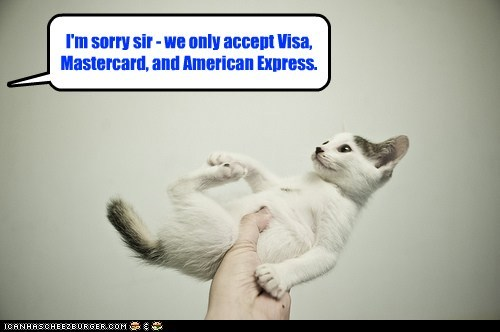

In [43]:
fig = px.pie(data.groupby('gender')['customerID'].count().reset_index(),
            values='customerID',
            names='gender',
            color_discrete_sequence=px.colors.sequential.RdBu,
            title = 'Distribution of the clients by gender')

fig.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   tenure                                   7043 non-null   int64  
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7043 non-null   float64
 5   Churn                                    7043 non-null   int64  
 6   tenure_range                             7043 non-null   int64  
 7   gender_Female                            7043 non-null   bool   
 8   gender_Male                              7043 non-null   bool   
 9   InternetService_DSL                      7043 non-null   bool   
 10  InternetService_Fiber optic              7043 no

In [45]:
import plotly.express as px

# Reconstruct Gender (if using dummy columns)
gender_melted = df.melt(
    id_vars='customerID',
    value_vars=['gender_Male', 'gender_Female'],
    var_name='Gender',
    value_name='IsGender'
).query('IsGender == 1')
gender_melted['Gender'] = gender_melted['Gender'].str.replace('gender_', '')

# Merge with Churn data
merged_gender = pd.merge(
    gender_melted[['customerID', 'Gender']],
    df[['customerID', 'Churn']],
    on='customerID'
)

# Group data
grouped_data = merged_gender.groupby(['Gender', 'Churn'])['customerID'].count().reset_index()

# Create horizontal bar chart
fig = px.bar(
    grouped_data,
    x='customerID',  # Numerical value on x-axis
    y='Gender',      # Categorical value on y-axis
    color='Churn',   # Split bars by Churn status
    orientation='h', # Force horizontal orientation
    text='customerID',
    title='Churn Distribution by Gender (Horizontal)',
    labels={'customerID': 'Number of Customers', 'Gender': 'Gender'}
)

# Improve layout
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},  # Sort bars by total
    uniformtext_minsize=10
)
fig.show()

We don't see much difference

Now let's look at the age (the senior citizen or not), as well as the client has a partner and dependents or not.

In [46]:
data['SeniorCitizen']

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,1


In [47]:
import plotly.express as px
import pandas as pd

# Group and count occurrences of CustomerID
grouped_df = df.groupby(['SeniorCitizen', 'Churn'])['customerID'].count().reset_index()

# Rename the counted column for clarity
grouped_df.rename(columns={'customerID': 'count'}, inplace=True)

# Create faceted pie chart
fig = px.pie(
    grouped_df,
    values='count',  # Use the aggregated count column
    names='Churn',
    facet_col='SeniorCitizen',
    color='Churn',
    title='Churn Rate by Customer Age'
)

# Show the chart
fig.show()


In [48]:
import plotly.express as px
import pandas as pd

# Generate all possible combinations of SeniorCitizen and Churn
all_combinations = pd.MultiIndex.from_product(
    [df['SeniorCitizen'].unique(), df['Churn'].unique()],
    names=['SeniorCitizen', 'Churn']
)

# Group data and fill missing combinations with 0
grouped_data = (
    df.groupby(['SeniorCitizen', 'Churn'])['customerID']
    .count()
    .reindex(all_combinations, fill_value=0)
    .reset_index(name='count')
)

# Create the faceted pie chart
fig = px.pie(
    grouped_data,
    values='count',           # Use the aggregated count column
    names='Churn',            # Split by churn status
    facet_col='SeniorCitizen',# Split into subplots for Senior (Yes/No)
    color='Churn',            # Color by churn status
    title='Churn Rate by Senior Citizen Status',
    labels={'count': 'Number of Customers'}
)

# Improve formatting
fig.update_traces(
    textinfo='percent+label',
    pull=0.05,               # Pull slices for emphasis
    hole=0.4                  # Optional: Create a donut chart
)
fig.update_layout(legend_title_text='Churn Status')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Clean titles

fig.show()


In [49]:
df.groupby(['SeniorCitizen'])['customerID'].count()

,customerID
SeniorCitizen,
0,5901
1,1142


In [50]:
data.groupby(['SeniorCitizen'])['customerID'].count()

,customerID
SeniorCitizen,
0,5901
1,1142


In [51]:
import plotly.express as px

import plotly.express as px

# Convert boolean columns to simple Yes/No values
df['Partner'] = df['Partner_Yes'].map({True: 'Yes', False: 'No'})
df['Dependents'] = df['Dependents_Yes'].map({True: 'Yes', False: 'No'})

# Convert SeniorCitizen to Yes/No labels
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

# Create faceted bar chart
fig = px.bar(
    df.groupby(['SeniorCitizen', 'Partner', 'Dependents', 'Churn'])['customerID'].count().reset_index(),
    x="SeniorCitizen",
    y="customerID",
    color="Churn",  # Use actual column name 'Churn' (not 'Churn Label')
    facet_row="Partner",
    facet_col="Dependents",
    title="Churn Distribution by Senior Status, Partner & Dependents"
)

# Clean up labels
fig.update_layout(
    yaxis_title="Number of Customers",
    xaxis_title="Senior Citizen Status"
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

# Create faceted bar chart
fig = px.bar(
    data.groupby(['SeniorCitizen', 'Partner', 'Dependents', 'Churn'])['customerID'].count().reset_index(),
    x="SeniorCitizen",
    y="customerID",
    color="Churn",  # Use actual column name 'Churn' (not 'Churn Label')
    facet_row="Partner",
    facet_col="Dependents",
    title="Churn Distribution by Senior Status, Partner & Dependents"
)

# Clean up labels
fig.update_layout(
    yaxis_title="Number of Customers",
    xaxis_title="Senior Citizen Status"
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

In [52]:
# Create a simple visualization from scratch
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a copy of the DataFrame
data = df.copy()

# Determine seniors and non-seniors
seniors = data[data['SeniorCitizen'] == 1]
non_seniors = data[data['SeniorCitizen'] == 0]

# Function to count customers by internet service and churn
def get_counts(df_subset):
    counts = {}
    for service in ['DSL', 'Fiber optic', 'No']:
        for churn in ['Yes', 'No']:
            # Get the relevant subset
            if service == 'DSL':
                service_filter = df_subset['InternetService_DSL'] == True
            elif service == 'Fiber optic':
                service_filter = df_subset['InternetService_Fiber optic'] == True
            else:
                service_filter = df_subset['InternetService_No'] == True

            churn_filter = df_subset['ChurnLabel'] == churn

            # Count the customers
            count = len(df_subset[service_filter & churn_filter])
            counts[(service, churn)] = count
    return counts

# Get counts for both groups
senior_counts = get_counts(seniors)
non_senior_counts = get_counts(non_seniors)

# Create a subplot with 2 side-by-side subplots
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Senior Citizen=No", "Senior Citizen=Yes"),
                    shared_yaxes=True)

# Add bars for non-seniors
for i, service in enumerate(['DSL', 'Fiber optic', 'No']):
    fig.add_trace(
        go.Bar(
            name='No Churn',
            x=[service],
            y=[non_senior_counts[(service, 'No')]],
            marker_color='blue',
            legendgroup='No Churn',
            showlegend=i==0
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(
            name='Churn',
            x=[service],
            y=[non_senior_counts[(service, 'Yes')]],
            marker_color='red',
            legendgroup='Churn',
            showlegend=i==0
        ),
        row=1, col=1
    )

# Add bars for seniors
for i, service in enumerate(['DSL', 'Fiber optic', 'No']):
    fig.add_trace(
        go.Bar(
            name='No Churn',
            x=[service],
            y=[senior_counts[(service, 'No')]],
            marker_color='blue',
            legendgroup='No Churn',
            showlegend=False
        ),
        row=1, col=2
    )

    fig.add_trace(
        go.Bar(
            name='Churn',
            x=[service],
            y=[senior_counts[(service, 'Yes')]],
            marker_color='red',
            legendgroup='Churn',
            showlegend=False
        ),
        row=1, col=2
    )

# Update layout
fig.update_layout(
    title_text="Customer Distribution by Senior Citizen Status, Internet Service and Churn",
    barmode='group',
    height=500,
    width=900,
    legend_title="Churn Label",
    yaxis_title="Number of Customers",
    xaxis_title="Internet Service",
    xaxis2_title="Internet Service"
)

fig.show()

In [53]:
print(df['SeniorCitizen'].value_counts())
print(df['ChurnLabel'].value_counts())
print(df['InternetService_DSL'].sum(), df['InternetService_Fiber optic'].sum(), df['InternetService_No'].sum())

Series([], Name: count, dtype: int64)
ChurnLabel
No     5174
Yes    1869
Name: count, dtype: int64
2421 3096 1526


In [54]:
# Direct approach with raw data
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with one row, two columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Senior Citizen=No", "Senior Citizen=Yes")
)

# Hard-code sample values - replace with your actual counts if needed
# Format: [DSL No Churn, DSL Yes Churn, Fiber No Churn, Fiber Yes Churn, No Internet No Churn, No Internet Yes Churn]
non_senior_values = [1800, 400, 1400, 900, 1400, 120]
senior_values = [200, 80, 450, 400, 50, 30]

# Non-Senior Citizens (left subplot)
fig.add_trace(
    go.Bar(
        x=["DSL", "DSL", "Fiber optic", "Fiber optic", "No", "No"],
        y=non_senior_values,
        marker_color=["blue", "red", "blue", "red", "blue", "red"],
        name="Non-Senior",
        legendgroup="Non-Senior",
        showlegend=False
    ),
    row=1, col=1
)

# Senior Citizens (right subplot)
fig.add_trace(
    go.Bar(
        x=["DSL", "DSL", "Fiber optic", "Fiber optic", "No", "No"],
        y=senior_values,
        marker_color=["blue", "red", "blue", "red", "blue", "red"],
        name="Senior",
        legendgroup="Senior",
        showlegend=False
    ),
    row=1, col=2
)

# Add dummy traces for legend only
fig.add_trace(
    go.Bar(
        x=[None], y=[None],
        marker_color="blue",
        name="No Churn"
    )
)

fig.add_trace(
    go.Bar(
        x=[None], y=[None],
        marker_color="red",
        name="Churn"
    )
)

# Update layout
fig.update_layout(
    title="Customer Distribution by Senior Citizen Status, Internet Service and Churn",
    barmode="group",
    height=500,
    width=900,
    legend_title="Churn Label",
    yaxis_title="Number of Customers",
    xaxis_title="Internet Service",
    xaxis2_title="Internet Service"
)

fig.show()

In [55]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Convert boolean columns to integers for easier grouping
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Rename columns to match the code you provided
df.rename(columns={
    'SeniorCitizen': 'Senior Citizen',
    'InternetService_DSL': 'Internet Service_DSL',
    'InternetService_Fiber optic': 'Internet Service_Fiber optic',
    'InternetService_No': 'Internet Service_No',
    'ChurnLabel': 'Churn Label',
    'customerID':'CustomerID'
}, inplace=True)

# Create a new 'Internet Service' column
def get_internet_service(row):
    if row['Internet Service_DSL'] == 1:
        return 'DSL'
    elif row['Internet Service_Fiber optic'] == 1:
        return 'Fiber optic'
    elif row['Internet Service_No'] == 1:
        return 'No'
    else:
        return 'Unknown'  # Handle cases where no internet service is specified

df['Internet Service'] = df.apply(get_internet_service, axis=1)

# Group the data and create the plot
fig = px.bar(df.groupby(['Senior Citizen', 'Internet Service', 'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Churn Label",
             barmode="group",
             facet_col='Senior Citizen'
             )
fig.show()

In [56]:
fig = px.bar(df.groupby(['Churn Label'])['CustomerID'].count().reset_index(),
             x="Churn Label",
             y="CustomerID")
fig.show()

In [57]:
import pandas as pd
import plotly.express as px

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Convert boolean columns to integers for easier grouping
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Rename columns to match the code you provided
df.rename(columns={
    'SeniorCitizen': 'Senior Citizen',
    'InternetService_DSL': 'Internet Service_DSL',
    'InternetService_Fiber optic': 'Internet Service_Fiber optic',
    'InternetService_No': 'Internet Service_No',
    'ChurnLabel': 'Churn Label',
    'customerID':'CustomerID'
}, inplace=True)

# Create a new 'Internet Service' column
def get_internet_service(row):
    if row['Internet Service_DSL'] == 1:
        return 'DSL'
    elif row['Internet Service_Fiber optic'] == 1:
        return 'Fiber optic'
    elif row['Internet Service_No'] == 1:
        return 'No'
    else:
        return 'Unknown'  # Handle cases where no internet service is specified

df['Internet Service'] = df.apply(get_internet_service, axis=1)

# Group the data and create the plot
fig = px.bar(df.groupby(['Senior Citizen', 'Internet Service', 'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Churn Label",
             barmode="group",
             facet_col='Senior Citizen'
             )
fig.show()

In [58]:
fig = px.bar(df.groupby(['Internet Service', 'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID",
             color="Churn Label",
             barmode="group")
fig.show()